(15)=
# Chapter 15: RDKit

There are far too many libraries useful for carrying out fundimental chemical calculations, analyses, and visualizations to cover in this book, but this chapter introduces one key library known as RDKit that is useful for tasks such as visualizing molcules, generating stereoisomers, filtering molecules based on structural features, and quantifying the number of hydrogen bond acceptors in a molecule. This is a popular library for those in chemical computing research with examples of its use being relatively easy to find in the chemical literature. As of this writing, RDKit can be installed with either conda or pip (see [section 0.2.1](0.2.1) and links below). If you are using Google Colab, you will need to install RDKit at the top of your notebook (see [section 0.2.2](0.2.2)) as it is not installed by default in Colab.

[Installing RDKit](https://www.rdkit.org/docs/Install.html)

This chapter assumes the following imports from RDKit.

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem

import matplotlib.pyplot as plt
import numpy as np

The RDKit package is useful for fundimental tasks in chemical computing such as visualizing molecules, interpreting molecular representations likes SMILES, and quantifying structural features in molecules. RDKit is composed of a number of modules including, but not limited to, the following.

| Module      | Description                |
|-------------|:---------------------------|
|`Chem`       |General purpose tools for chemistry ([RDKit website](https://www.rdkit.org/docs/source/rdkit.Chem.html#module-rdkit.Chem) describes it as "A module for molecules and stuff" |
|`ML`         |Machine learning tools      |

The `Chem` and `ML` modules are the major modules in RDKit, but for this chapter, we will only be fucusing on the `Chem` module which has already been imported above.

(15.1)=
## 15.1 Loading Molecular Representations into RDKit

There are many ways to depict molecular structures on paper such as Lewis structures, line-anlge structural formulas, and condensed notation. When representing molecules for a computer, other methods are prefered such as Simplified Molecular-Input Line-Entry System (SMILES), the International Chemical Identifier (InChI), or mol files. For example, the SMILES and InChI representations for benzene are listed below.

    SMILES: c1ccccc1

    InChI: 1S/C6H6/c1-2-4-6-5-3-1/h1-6H

These are not the most human-readable formats, but computer software such as RDKit is quite good at dealing with them. We will not get into the structure of and rules for interpreting these representations in this book because it is not really necceary; reading and writing them is RDKit's job. You can obtain the these representations of a molecular structure from a variety of [sources](https://blogs.rsc.org/chemspider/2019/11/08/tips-and-tricks-generating-machine-readable-structural-data-from-a-chemdraw-structure/) such as generating them from chemial drawing software (e.g., ChemDraw or ChemDoodle), searching [NIST Chemical Webbook](https://webbook.nist.gov/chemistry/), and many other sources. In this chapter, we will mainly focus on SMILES representations, but working with the InChI and mol file formats is analogous.

We can read and write molecular structures from a variety of formats including SMILES, InChI, and mol files using functions below. When reading these molecular structures, a Molecule object (RDKit-specific class of object) is generated. 

| Function      | Description                |
|-------------|:---------------------------|
|`Chem.MolFromSmiles()`   | Loads molecules from SMILES representation |
|`Chem.MolToSmiles()` | Generates SMILES representation of a molecule |
|`Chem.inchi.MolFromInchi()` | Loads molecules from InChI representation |
|`Chem.inchi.MolToInchi()` | Generates InChI representation |

As an example, we will load the structure of aspirin (acetylsalicylic acid) using the `Chem.MolFromSmiles()` function from the `Chem` module.

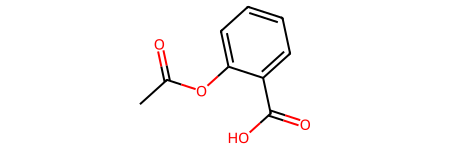

In [4]:
aspirin = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
aspirin

If we check the type of object, we get that it is a Molecule (`rdchem.Mol`) object from RDKit.

In [5]:
type(aspirin)

rdkit.Chem.rdchem.Mol

To view the molecule, we can use the `Chem.Draw.MolToImage()` function. If we want to save this image as an external file, use the `Chem.Draw.MolToFile(Mol, file_name)` function which takes two requires positional argument of the Molecule object and the file name as a string. Other optional keyword arguments can be used to set other parameters such as file size and file type.

In [6]:
Chem.Draw.MolToFile(aspirin, 'aspirin.png',
                    size=(500,500),
                    imageType='svg')

RDKit can generate other molecular represenations such as InChI from the Molecule object as demosntrated below.

In [7]:
Chem.inchi.MolToInchi(aspirin)

'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)'

(15.2)=
## 15.2 Visualizing Chemical Structures

In the above examples, RDKit provided an image of the molecule, but it is relatively low resolution and it does not provide much control over the produced image. Here, we will generate higher quality images that can be saved along along with visualizing grids of molecules and other visual representations of molecules.

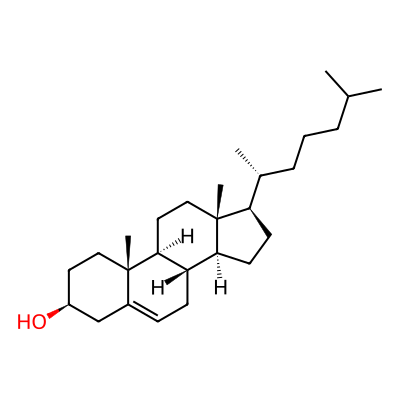

In [8]:
cholesterol = Chem.MolFromMolFile('data/cholesterol.mol')
Chem.Draw.MolToImage(cholesterol, size=(400,400))

If we want to save the image to a file, this is accomplished using the `Chem.Draw.MolToFile()` function which requires two pieces of information - the mol object and name of the new file.

~~~python
Chem.Draw.MolToFile(mol_object, 'file_name.png', size=(width, height), imageType='png')
~~~

Other optional parameters are the `size=` which is a tuple that takes the width and height, respectively, in pixels, and the `imageType=` accepts a string to designate the file format ('png' or 'svg').



In [9]:
Chem.Draw.MolToFile(cholesterol, 'cholesterol.svg', size=(500,500), imageType='svg')

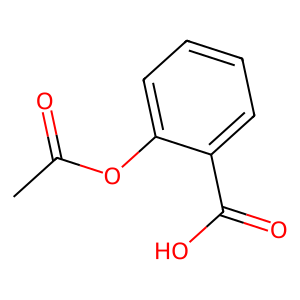

In [10]:
Chem.Draw.MolToImage(aspirin)

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('data/amino_acid_SMILES.txt', skiprows=2)
df

,name,SMILES
0,alanine,C[C@@H](C(=O)[O-])[NH3+]
1,arginine,[NH3+][C@@H](CCCNC(=[NH2+])N)C(=O)[O-]
2,asparagine,O=C(N)C[C@H]([NH3+])C(=O)[O-]
3,aspartate,C([C@@H](C(=O)[O-])[NH3+])C(=O)[O-]
4,cysteine,C([C@@H](C(=O)[O-])[NH3+])S
5,glutamine,[NH3+][C@@H](CCC(=O)N)C([O-])=O
6,glutamate,C(CC(=O)[O-])[C@@H](C(=O)[O-])[NH3+]
7,glycine,C(C(=O)[O-])[NH3+]
8,histidine,O=C([C@H](CC1=CNC=N1)[NH3+])[O-]
9,isoleucine,CC[C@H](C)[C@@H](C(=O)[O-])[NH3+]


In [13]:
AA_smiles = [Chem.MolFromSmiles(SMILES) for SMILES in df['SMILES']]
AA_smiles

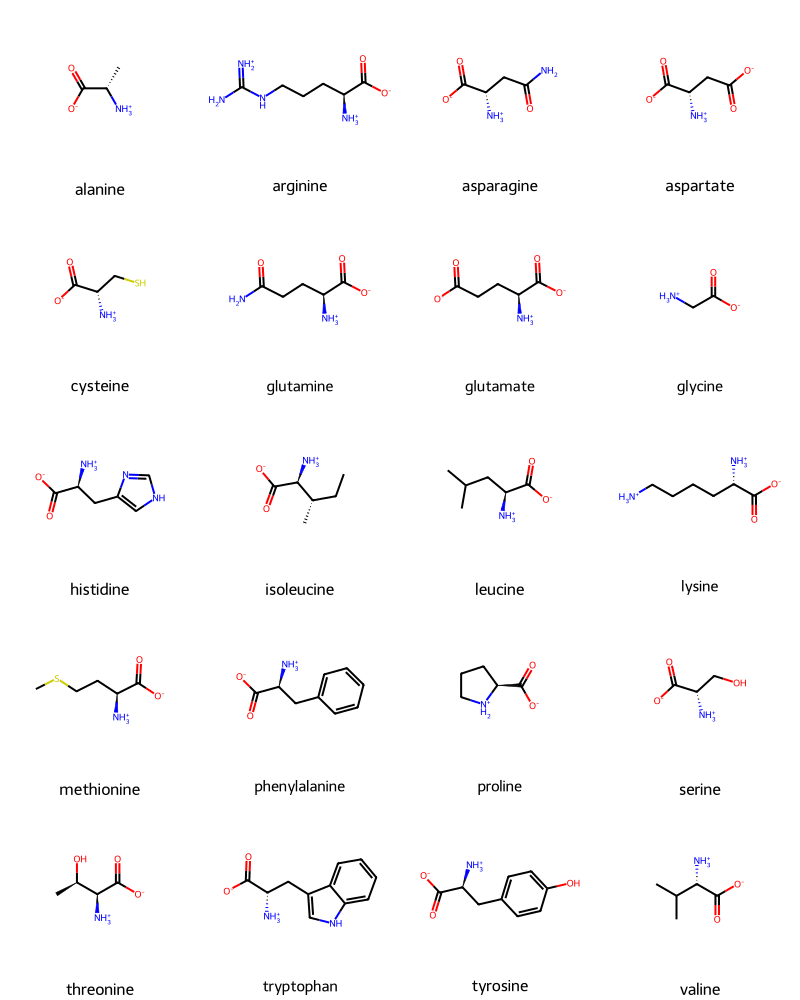

In [14]:
Chem.Draw.MolsToGridImage(AA_smiles, 
                          molsPerRow=4,
                          subImgSize=(200,200),
                          legends=list(df['name'])
                         )    

In [15]:
benzaldehyde = 'c1ccc(cc1)C=O'
PhMgBr = 'Br[Mg]c1ccccc1'
Ph2COH = 'OC(c1ccccc1)c2ccccc2'

rxn = Chem.AllChem.ReactionFromSmarts('c1ccc(cc1)C=O.Br[Mg]c1ccccc1>>OC(c1ccccc1)c2ccccc2' )

In [16]:
d2d = Chem.Draw.MolDraw2DCairo(800,300)

d2d.DrawReaction(rxn)

In [17]:
Chem.Draw.MolDraw2DCairo(800,300).DrawReaction(rxn)

Molecules can also be displayed on plots created by matplotlib. For example, 

In [18]:
cinn_acid = Chem.MolFromSmiles('    O=C(O)\C=C\c1ccccc1')
image = Chem.Draw.MolToImage(cinn_acid)

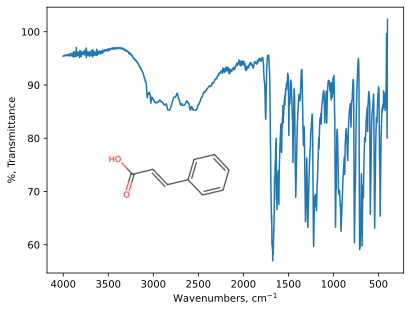

In [19]:
IR = np.genfromtxt('data/cinnamic_acid.CSV', delimiter=',')
plt.plot(IR[:-1,0], IR[:-1,1])
plt.gca().invert_xaxis()
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('%, Transmittance')

ax = plt.axes([0.15, 0.2, 0.48, 0.38], frameon=False)
ax.axis('off')
ax.imshow(image)

(15.3)=
## 15.3 Stereochemistry



(15.4)=
## 15.4 `Chem.Descriptor` Module 

```{index} descriptors
```
```{index} features
```

RDKit can be use to determine a number of key physical properties of molecules known as **descriptors** using the `Chem.Descriptor` module. These can be useful for generating features for large number of molecules in machine learning or understanding structural trends in a body of chemical compounds.


(15.4,.1)=
### 15.4.1 Molecular Features

There are numerous descriptor functions available which are callable using `Chem.Descriptors.method()` where `method()` is the name of a descriptor function that accepts an RDKit molecule object and returns a value. Below is are a few examples of descriptor functions in `Chem.Descriptor` module, and a more complete list is available on the [RDKit website](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors).


| Function    |  Description |
|-------------|---------------------------|
|`MolWt` | Molecular weight, assumes natural isotopic distribution  |
|`HeavyAtomCount()` | Number of non-hydrogen atoms |
|`NOCount()` | Number of N and O atoms |
|`NumAliphaticRings()` | Number of aliphatic rings
|`NumAromaticRings()` | Number of aromatic rings |
|`NumSaturatedRings()` | Number of saturated rings |
|`NumHAcceptors()`   | Number of hydrogen bond acceptors   |
|`NumHDonors()` | Number of hydrogen bond donors |
|`NumRadicalElectrons()`   |Number of radical electrons |
|`NumValenceElectrons()` | Number of valence electrons |
|`NumRotatableBonds()` | Number of ratatable bonds |
|`RingCount()` | Number of rings |

Below we will look at a few of these descriptor functions demonstrated on the compound paclitaxel.

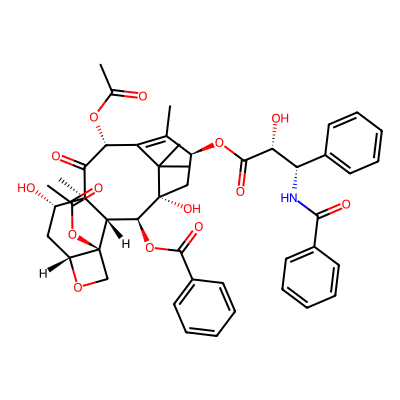

In [35]:
ptx = Chem.MolFromSmiles('CC1=C2[C@@]([C@]([C@H]([C@@H]3[C@]4([C@H](OC4)C[C@@H]'\
                         '([C@]3(C(=O)[C@@H]2OC(=O)C)C)O)OC(=O)C)OC(=O)c5ccccc5)'\
                         '(C[C@@H]1OC(=O)[C@H](O)[C@@H](NC(=O)c6ccccc6)c7ccccc7)O)(C)C')
Chem.Draw.MolToImage(ptx, size=(400,400))

(15.4.2)=
### 15.4.2 Quantifying Functional Groups

Among the descriptor methods is a long list of function that look like `fr_group()` where `group` is the name or abbreviation of a chemical functional group. These functions return an integer quantification of many of that type of functional group are present in the molecule provided. A table of a few examples is provided below, but the number of these available functions is so long (86 at my last count) that it's not reaasonable to list them all here. 

| Function    |  Functional Group Counted |
|-------------|---------------------------|
|`fr_Al_OH()` | Aliphatic alcohols  |
|`fr_aldehyde()` | Aldehydes |
|`fr_amide()` | Amide |
|`fr_C_C()`   | Carbonyl oxygens   |
|`fr_guanido()` | Guanidine |
|`fr_NH0()`   | Amines with 0 H's (i.e., tertiary) |
|`fr_phenol()` | Phenol |
|`fr_phos_ester()` | Phosphoric ester |
|`fr_SH()` | Thiol |

```{tip}
To see a complete list of functional groups, type `Chem.Descriptors.fr_` into a code cell, press **Tab** for autocomplet, and see the long list of options. If the functional group is not obvious from the name, place the computer cursor inside the function's parentheses and press **Shift + Tab** to see the Docstring description of what functional group it is quantifying. 
```

(15.4.3)=
## 15.4.3 [FINISH] Molecular Fingerprints



In [ ]:
from rdkit.Chem import Descriptors
desc = Chem.Descriptors.CalcMolDescriptors(ptx)

(15.5)=
## 15.5 Filtering Molecules

Molecules can be searched for key substructures

In [ ]:
common_sub = Chem.MolFromSmiles('C(C(=O)[O-])[NH3+]')

matching_amino_acids = [AA for AA in AA_smiles if AA.HasSubstructMatch(common_sub)]

no_match = [AA for AA in AA_smiles if not AA.HasSubstructMatch(common_sub)]

AllChem.Compute2DCoords(common_sub)

# orients common substructures the same way
for amino_acid in matching_amino_acids:
    _ = AllChem.GenerateDepictionMatching2DStructure(amino_acid, common_sub)
    
Chem.Draw.MolsToGridImage(matching_amino_acids, 
                          molsPerRow=4,
                          subImgSize=(200,200),
                          legends=list(df['name'])
                          ) 

In [ ]:
bond_pattern = Chem.MolFromSmiles('c1ccccc1')
AA_with_pattern = [AA for AA in AA_smiles if AA.HasSubstructMatch(bond_pattern)]

Chem.Draw.MolsToGridImage(AA_with_pattern)

In [ ]:
AA_zipped = list(zip(df['name'], AA_smiles))

bond_pattern = Chem.MolFromSmiles('c1ccccc1')
with_pattern = [AA for AA in AA_zipped if AA[1].HasSubstructMatch(bond_pattern)]

name = [AA[0] for AA in with_pattern]
mol_obj =  [AA[1] for AA in with_pattern]

Chem.Draw.MolsToGridImage(mol_obj, legends=name)

In [ ]:
from rdkit.Chem.Draw import SimilarityMaps

mol = Chem.MolFromSmiles('c1[nH]c2ccccc2c1C[C@H]([NH3+])C(=O)[O-]') #tryptophan
refmol = Chem.MolFromSmiles('O=C([C@H](CC1=CNC=N1)[NH3+])[O-]') #histodine

fingerprint = SimilarityMaps.GetMorganFingerprint

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, fingerprint)

In [ ]:
from rdkit.Chem.Draw import SimilarityMaps

mol = Chem.MolFromSmiles('[NH3+][C@@H](CC1=CC=CC=C1)C([O-])=O') 

refmol = Chem.MolFromSmiles('c1ccccc1')

fingerprint = SimilarityMaps.GetMorganFingerprint

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, fingerprint)

(15.6)=
## 15.6 Atoms and Bond

RDKit allows access to information on specific atoms and bond through the `GetAtoms()` and `GetBonds()` methods, respectively. These functions return a sequence type of object that can be iterated through using a `for` loop to access individual atoms or bonds. Using the following methods, the user can access or even modify various pieces of information about the atoms or bonds. Below are two tables of some key functions for working with atoms and bonds.

**Table #** Select Atom Methods
| Function | Description |
|------------|---------------|
|`GetDegree()` | Returns number of atoms bonded directly to it; does not count implicit hydrogens |
|`GetAtomicNum()` | Returns atomic number |
|`GetChiralTag()` | Returns if the atom is a chiral center and CW or CCW designation |
|`GetFormalCharge`() | Returns formal charage of atom   |
|`GetHybridization()` | Returns hybridization of atom     |
|`GetIsAromatic()`   | Returns bool as to whether atom is aromatic    |
|`GetIsotope()`   |  Returns isotope number if designated, otherwise returns `0`   |
|`GetNeighbors()` | Returns tuple of directly bonded atoms  |
|`GetSymbol()` |  Returns atomic symbols as a string |
|`GetTotalNumHs()` | Returns number of hydrogens bonded to the atom |
|`InInRing()` |  Returns bool designating if the atom is in a ring  |
|`SetAtomicNum()`| Sets the atomic number to user defined value |
|`SetFormalCharge()` |  Sets formal charge to user defined value |
|`SetIsotope()` |  Sets isotope to user defined integer value  |

As an example, let's look at the atoms in aspirin. 

In [ ]:
Chem.Draw.MolToImage(aspirin)

If we generate a list populated with the degrees, you may notice that there are no `4` values even though the methyl (i.e., -CH$_4$) carbon should have four atoms attached to it. This is because the hydrogens are not explicitly designated in the structure (i.e., the are implicit), so they are not counted.

In [ ]:
[atom.GetDegree() for atom in aspirin.GetAtoms()]

We can count the number of implicit hydrogens using the `GetNumImplicitHs()` method, and the third value is a `3` which must be the methyl carbon.

In [ ]:
[atom.GetNumImplicitHs() for atom in aspirin.GetAtoms()]

We can also use these atom methods to change values and attribues of various atoms. For example, we can set the isotopes of the carbonyl carbons (i.e., C=O) to $^{13}$C. This is accomplished with the following code that iterates through all the atoms as finds the carbonyl carbons by testing for atoms that have an atomic number of 6, are not aromatic, and have no hydrogens and then setting the isotope value to 13. The molecular weight is calculated before and after the isotopes are changed for comparison.

In [ ]:
Chem.Descriptors.MolWt(aspirin)

In [ ]:
for atom in aspirin.GetAtoms():
    if atom.GetAtomicNum() == 6 and \
        not atom.GetIsAromatic() and \
        atom.GetTotalNumHs() == 0:
    
        atom.SetIsotope(13)

In [ ]:
print(Chem.Descriptors.MolWt(aspirin))
Chem.Draw.MolToImage(aspirin)

The molar mass has increased due to two of the carbon atoms being isotopically labeled, and we can see in the image which two carbons were isotopically labeled. It's worth nothing that the molecular weight before isotopically labeling assumed a natural distribution of isotopes which for carbon is 98.9% $^{12}$C and 1.1% $^{13}$C. In the isotopically labeled structure, the two carbonyl carbons are 100% $^{13}$C.

Using bond methods, we can perform analogous types of operations except that bonds have different attributes than atoms. A table of selected bond methods is provided below.

**Table #** Select Bond Methods
| Function | Description |
|------------|---------------|
|`GetBeginAtom()` | Returns first atom in bond |
|`GetEndAtom()` | Returns second atom in bond |
|`GetBondType()` | Returns type of bond (e.g., SINGLE, DOUBLE, AROMATIC) |
|`GetIsAromatic()` | Returns bool as to whether bond is aromatic |
|`GetIsConjugated()` | Returns bool as to wether bond is conjugated |
|`IsInRing()` | Returns bool as to wether bond is in ring  |
|`SetBondType()` | Sets bond type (e.g., SINGLE, DOUBLE, AROMATIC) |
|`SetIsAromatic()` | Sets bool designating if a bond is aromatic |

As a demonstration, we will examine the bonds in the structure of acetone and change the carbonyl double bond to a single bond.

In [ ]:
acetone = Chem.MolFromSmiles('CC(=O)C')
Chem.Draw.MolToImage(acetone)

In [ ]:
for bond in acetone.GetBonds():
    if bond.GetBondType() == Chem.BondType.DOUBLE:
        bond.SetBondType(Chem.BondType.SINGLE)
        end = bond.GetEndAtom().SetFormalCharge(-1)
        begin = bond.GetBeginAtom().SetFormalCharge(+1)
Chem.Draw.MolToImage(acetone)

## Further Reading

1. RDKit: Open-Source Cheminformatics Software. [https://www.rdkit.org/](https://www.rdkit.org/) (free resource)

## Exercises

Complete the following exercises in a Jupyter notebook using RDKit. You are encouraged to also to use data libraries such as NumPy or pandas to support your solution. Any data file(s) refered to in the problems can be found in the [data](https://github.com/weisscharlesj/SciCompforChemists/tree/master/notebooks) folder in the same directory as this chapter's Jupyter notebook. Alternatively, you can download a zip file of the data for this chapter from [here](https://github.com/weisscharlesj/data_SciCompforChem) by selecting the appropriate chapter file and then clicking the **Download** button.